In [15]:
pip install scikit-learn

In [16]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from scipy import io
from scipy.io import loadmat
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score


In [17]:
dataset_folder = "Indian_pines.mat"
ground_truth_folder = "Indian_pines_gt.mat"
dataset_data = io.loadmat(dataset_folder)
ground_truth_data = io.loadmat(ground_truth_folder)
print("Keys in dataset_data:", dataset_data.keys())
print("Keys in ground_truth_data:", ground_truth_data.keys())

Keys in dataset_data: dict_keys(['__header__', '__version__', '__globals__', 'indian_pines'])
Keys in ground_truth_data: dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])


In [18]:
variable_name = 'indian_pines' #th the actual variable name
if variable_name in dataset_data:
    data = dataset_data[variable_name]
    print("Data shape:", data.shape)
    print("Data content:", data)
else:
    print(f"Variable '{variable_name}' not found in the .mat file.")

Data shape: (145, 145, 220)
Data content: [[[3172 4142 4506 ... 1020 1020 1005]
  [2580 4266 4502 ... 1029 1020 1000]
  [3687 4266 4421 ... 1030 1016 1009]
  ...
  [2570 3890 4320 ... 1021 1015 1025]
  [3170 4130 4320 ... 1024 1020 1011]
  [3172 3890 4316 ... 1034 1016 1015]]

 [[2576 4388 4334 ... 1030 1006 1015]
  [2747 4264 4592 ... 1039 1015 1020]
  [2750 4268 4423 ... 1026 1015 1020]
  ...
  [3859 4512 4605 ... 1035 1015  996]
  [3686 4264 4690 ... 1012 1020 1014]
  [2744 4268 4597 ... 1019 1016 1010]]

 [[2744 4146 4416 ... 1029 1025 1010]
  [2576 4389 4416 ... 1021 1011 1000]
  [2744 4273 4420 ... 1033 1010 1014]
  ...
  [2570 4266 4509 ... 1025 1010 1005]
  [2576 4262 4496 ... 1029 1020 1005]
  [2742 4142 4230 ... 1025 1011 1010]]

 ...

 [[3324 3728 4002 ... 1004 1004 1000]
  [2983 3604 3829 ... 1013 1008  995]
  [2988 3612 3913 ... 1001 1004 1003]
  ...
  [2564 4115 4103 ... 1005 1013 1009]
  [2730 4111 4103 ... 1013 1004 1004]
  [3156 3991 4103 ... 1014 1000 1009]]

 [[3161 

In [19]:
variable_name = 'indian_pines_gt' #th the actual variable name
if variable_name in ground_truth_data:
    data_gt = ground_truth_data[variable_name]
    print("Data shape:", data_gt.shape)
    print("Data content:", data_gt)
else:
    print(f"Variable '{variable_name}' not found in the .mat file.")

Data shape: (145, 145)
Data content: [[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
y = np.asarray(data_gt)
print(y[0:1])
y2 = y.reshape(-1)
print(y2.shape)
df = pd.DataFrame()
df['Orginal image'] = y2
print(df.head())#labels

[[ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  0  3  3  3
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15
  15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15  0
   0 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]]
(21025,)
   Orginal image
0              3
1              3
2              3
3              3
4              3


In [21]:
# Reshape the images to 2D arrays (samples x bands)
num_rows, num_cols, num_bands = data.shape
images_reshaped = data.reshape(num_rows * num_cols, num_bands)

# Stack individual bands to create a feature matrix
#features = np.concatenate([images_reshaped[ :, i] for i in range(num_bands)], axis=1)

print(images_reshaped.shape)
X = pd.DataFrame(data = images_reshaped)
X = pd.concat([X, pd.DataFrame(data = y.ravel())], axis = 1)
print(X)

(21025, 220)
        0     1     2     3     4     5     6     7     8     9    ...   211  \
0      3172  4142  4506  4279  4782  5048  5213  5106  5053  4750  ...  1090   
1      2580  4266  4502  4426  4853  5249  5352  5353  5347  5065  ...  1104   
2      3687  4266  4421  4498  5019  5293  5438  5427  5383  5132  ...  1114   
3      2749  4258  4603  4493  4958  5234  5417  5355  5349  5096  ...  1108   
4      2746  4018  4675  4417  4886  5117  5215  5096  5098  4834  ...  1107   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
21020  2561  3987  4011  4023  4201  4377  4418  4248  4180  3838  ...  1012   
21021  2726  4104  4024  3880  4210  4377  4413  4174  4229  3900  ...  1014   
21022  3153  3864  4282  3889  4310  4372  4375  4208  4096  3878  ...  1015   
21023  3155  4104  4106  4027  4139  4318  4413  4174  4140  3933  ...  1011   
21024  3323  3860  4197  3952  4148  4279  4375  4225  3988  3866  ...  1014   

        212   213   214   

In [22]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(images_reshaped,y2,test_size = 0.5,random_state = 4)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X, y2, range(num_rows * num_cols), test_size=0.5, random_state=42
)
print(X_train.shape)
print(y_train.shape)

(10512, 221)
(10512,)


In [23]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
X_train_prediction = svm_classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print("Accuracy score of the training data is: ", training_data_accuracy)
y_prediction = svm_classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_prediction, y_test)
print("Accuracy score of the test data is: ", test_data_accuracy)

Accuracy score of the training data is:  0.9666095890410958
Accuracy score of the test data is:  0.8917530676305526


<Axes: >

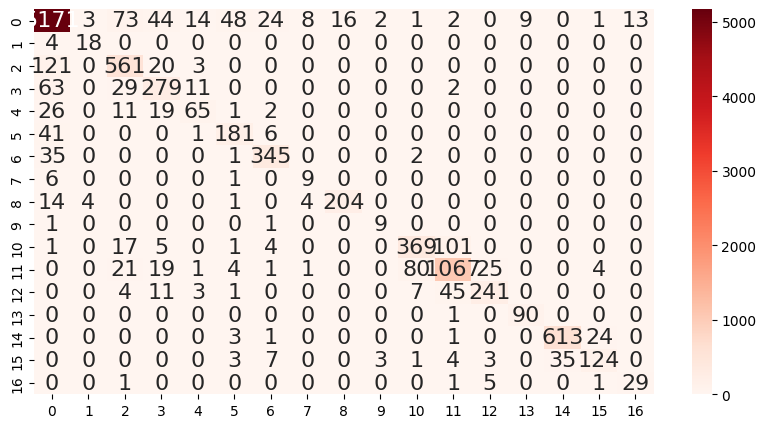

In [32]:
import seaborn as sns
c_matrix = confusion_matrix(y_test, y_prediction)

plt.figure(figsize = (10,5))
#sns.set(font_scale = 1.4) #for label size
sns.heatmap(c_matrix, cmap = "Reds", annot = True, annot_kws = {"size": 16}, fmt = "d")

<ipython-input-25-08bf4b511717>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clmap = np.array(l).reshape(145, 145).astype("float")


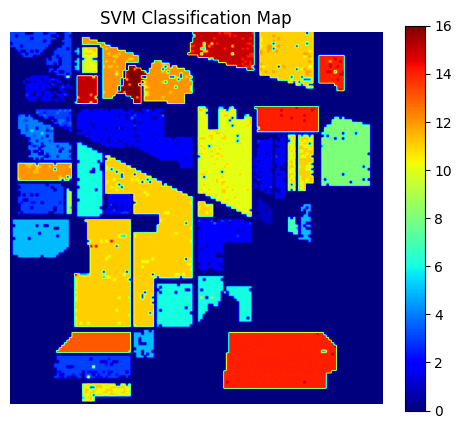

In [25]:
l =[]
X = pd.concat([X, pd.DataFrame(data = y.ravel())], axis = 1)
for i in range(X.shape[0]):
    if X.iloc[i, -1] == 0:
        l.append(0)
    else:
        l.append(svm_classifier.predict(X.iloc[i, :-1].values.reshape(1, -1)))
plt.figure(figsize = (6, 5))
clmap = np.array(l).reshape(145, 145).astype("float")
plt.imshow(clmap, cmap = "jet")
plt.colorbar()
plt.axis("off")
plt.title("SVM Classification Map")
plt.savefig("svm_classification_map.png")
plt.show()


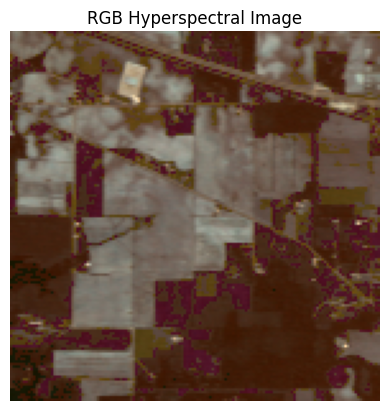

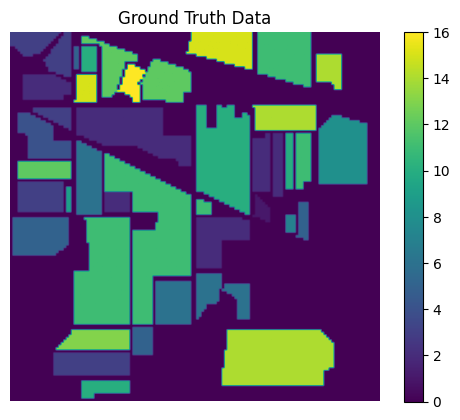

In [28]:
#before implementation
rgb_bands = [10, 20, 30]
rgb_image = data[:, :, rgb_bands]
rgb_image = (rgb_image - np.min(rgb_image)) / (np.max(rgb_image) - np.min(rgb_image))
plt.imshow(rgb_image)
plt.title('RGB Hyperspectral Image')
plt.axis('off')
plt.show()

if ground_truth_data is not None:
    plt.imshow(y, cmap='viridis')
    plt.title('Ground Truth Data')
    plt.colorbar()
    plt.axis('off')
    plt.show()